# Check-up notebook

## Checking that the random times conditions for N_A, N_a and N_X$ 

In [1]:
from estimator import *
import numpy as np
from simulate_M import *
import pandas as pd
import numpy.linalg as nl

In [2]:
# Standard setup
d=3
delta = 0.05
cov = np.identity(d)
bar_sigma = np.sqrt(max(np.diag(cov)))
gamma =0.5
no = compute_no(a,bar_sigma,d)

NameError: name 'a' is not defined

## Check that for $n>N_A$ one has $An>\gamma*n$

70


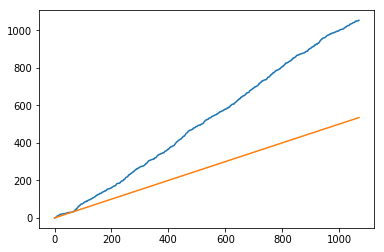

In [20]:
S = algorithm_S_NA()
S_NA = sample_without_record(S[-1],1000)

n_gamma = gamma*np.arange(1,len(S+S_NA)+1)
A_NA = n_gamma - (S+S_NA)

N_A = len(S)
print(N_A)

pd.Series(A_NA).plot() # Check that Sn for all n in [NA,N] is negative OK
pd.Series(n_gamma).plot()

Seems ok

## Check that for n>Na $\gamma*n> A_1*(n^a)*exp(||X_1||_{\inf})$ 

N_a = 782


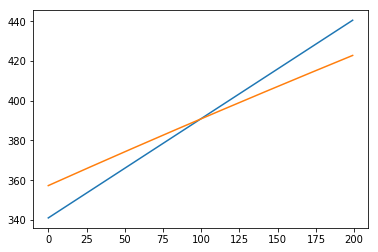

In [23]:
a = compute_a(cov, delta)
A1 = simulate_An(1)[0]
X1 = simul_Xk(cov, size=1) # Generate  

N_a = compute_Na(d,cov,a,A1,X1)
print('N_a =',N_a)
n = np.arange(max(N_a-100,0),N_a+100)

pd.Series(n*gamma).plot()
pd.Series(A1*np.power(n,a)*np.exp(nl.norm(X1, ord=np.inf))).plot()

Seems ok

## Check that for n>N_X $||X_n||_{\inf}<a*\log{n}$ 

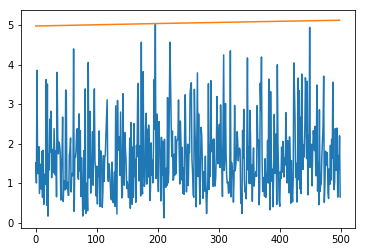

In [12]:
n1 = 2000
X_NX_to_N = sample_without_recordX(a,n1,500,cov)
norm_X_NX_to_N = np.max(np.abs(X_NX_to_N),axis=-1)
a_log_n = a*np.log(n1+np.arange(1,500))

pd.Series(norm_X_NX_to_N).plot()
pd.Series(a_log_n).plot()

Seems ok 

## Distribution of the ad_hoc variable L 

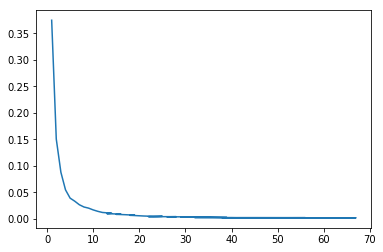

In [36]:
L_sample = []
for i in range(10000):
    L_sample.append(simulate_L()) 
    
# Take the distribution without the tail for a better display
distrib_L_without_tail = pd.Series(L_sample).value_counts()[:50]
(pd.Series(distrib_L_without_tail)/np.sum(distrib_L_without_tail)).plot()

Most of the time L takes values between 1 and 10

## Unsolved issues

Page 16 in the article: 

$E[exp(\theta*S1)]=1$ $\forall{\theta}>0$ seems not to have solutions. 

Hence the dyadic search algorithm converges to $theta=0$ and crashes...

In [7]:
Ao=0 
LAMBDA=1 
gamma=.5
nb_iter=1000
epsilon=10**(-6)

INF_search = 0 
SUP_search = 7
NB_SAMPLE = 10000

theta = (SUP_search + INF_search)/2

while nb_iter>=0:  
    print(theta)
    A1 = Ao + np.random.poisson(1, size=(NB_SAMPLE)) 
    S1 = -A1 + gamma 
    
    cond = np.abs(np.exp((theta*S1)).mean(axis=0)-1) # Approximate the expectation by a mean over NB_SAMPLE samples

    if (cond-1 <-epsilon/2): # E(exp(theta*S1))-1 in [-inf,-epsilon/2]
        SUP_search = theta
    elif (cond-1 > epsilon/2): # E(exp(theta*S1))-1 in [epsilon/2, inf]
        INF_search = theta
    else: #a in [-epsilon/2,epsilon/2]: convergence
        print(int(np.floor(theta)))
        break
    nb_iter-=1

    theta = (INF_search+SUP_search)/2

3.5
5.25
6.125
6.5625
6.78125
6.890625
6.9453125
6.97265625
6.986328125
6.9931640625
6.99658203125
6.998291015625
6.9991455078125
6.99957275390625
6.999786376953125
6.9998931884765625
6.999946594238281
6.999973297119141
6.99998664855957
6.999993324279785
6.999996662139893
6.999998331069946
6.999999165534973
6.999999582767487
6.999999791383743
6.999999895691872
6.999999947845936
6.999999973922968
6.999999986961484
6.999999993480742
6.999999996740371
6.9999999983701855
6.999999999185093
6.999999999592546
6.999999999796273
6.999999999898137
6.999999999949068
6.999999999974534
6.999999999987267
6.9999999999936335
6.999999999996817
6.999999999998408
6.999999999999204
6.999999999999602
6.999999999999801
6.9999999999999005
6.99999999999995
6.999999999999975
6.999999999999988
6.999999999999994
6.9999999999999964
6.999999999999998
6.999999999999999
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0


Page 18/22 section 5.2

Concerning the computation of "a", there is a $\delta$ in the expression that is not introduced in the paper.

It actually comes from the paper from which the algorithm to sample An and Xn is coming from: "ON OPTIMAL EXACT SIMULATION OF MAX-STABLE AND RELATED RANDOM FIELDS ON A COMPACT SET", reference \[10\] in the current paper. 

It used to control the approximation error, but now the computation of g_o(x) seems to rule this issue.
The following graph shows that $\delta$ has no clear effect of a...

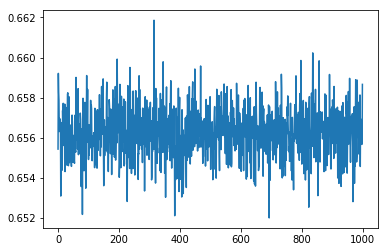

In [33]:
a_delta_values = []
linspace = np.linspace(0.000001,0.9999,1000)
for de in linspace:
    a_delta_values.append(compute_a(cov,delta))
pd.Series(a_delta_values).plot() # Looks like a white noise of mean 0.6--

### N_a is very often very big and then N-N_X also

As a result, one has to compute $X_i \forall{i} \in [N_X, N]$ with sample_single_record.

But as mentioned in [10] this functions outputs "degenerated" $100*(1-\delta)$\% of the time especially when $\eta_1$ is low. 

We are then stuck in an infinite loop.

In [39]:
# Might be long to run
iters = 100
non_degenerate=0
for i in range(1,iters):
    if type(sample_single_record(a,no,no, cov)) != str:
        non_degenerate+=1
print("sample_single_record outputs degenerated ",100*(1- non_degenerate/iters), "% of time")

99.4 % of degenerated


I have then to check where does the problem comes from